# Using a TF Dense Neural Network Classifier API

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

## Reading the data

In [2]:
diabetes = pd.read_csv('pima-indians-diabetes.csv')
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [3]:
diabetes.describe()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,33.240885,0.348958
std,3.369578,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,1.000000,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,24.000000,0.000000
50%,3.000000,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,29.000000,0.000000
75%,6.000000,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,41.000000,1.000000
max,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000,1.000000


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Number_pregnant          768 non-null int64
Glucose_concentration    768 non-null float64
Blood_pressure           768 non-null float64
Triceps                  768 non-null float64
Insulin                  768 non-null float64
BMI                      768 non-null float64
Pedigree                 768 non-null float64
Age                      768 non-null int64
Class                    768 non-null int64
Group                    768 non-null object
dtypes: float64(6), int64(3), object(1)
memory usage: 60.1+ KB


In [5]:
diabetes.dtypes.value_counts()

float64    6
int64      3
object     1
dtype: int64

In [7]:
diabetes.isnull().any()

Number_pregnant          False
Glucose_concentration    False
Blood_pressure           False
Triceps                  False
Insulin                  False
BMI                      False
Pedigree                 False
Age                      False
Class                    False
Group                    False
dtype: bool

## Preprocessing

In [8]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [17]:
# Normalization
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']
# Normalizing using pandas
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(
    lambda x:((x-x.min())/(x.max()-x.min())))
diabetes.describe() # See that max = 1 and min = 0 for selected cols

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,33.240885,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,24.000000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,29.000000,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,41.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,81.000000,1.000000


## Making Feature Columns for TFE API

In [18]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [20]:
# Numeric Columns
# Make individual feature columns
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [21]:
# Categorical Features
# Using vocabulary List
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list(
                'Group', ['A', 'B', 'C', 'D'])
# Not doing embedding right now to show the error in training due to lack of embedding in catCols
# When using a DNNClassifier, we need to embed the categorical feature column using
# tf.feature_column.embedding_column(catCol=tf.feature_column, dimension=int)

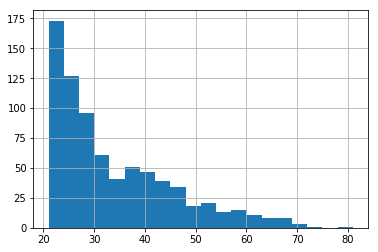

In [23]:
# Binning Age
diabetes['Age'].hist(bins=20);

In [24]:
# Binnign age into categories
age_bucket = tf.feature_column.bucketized_column(age, 
                                        boundaries=[10, 20, 30, 40, 50, 60, 70, 80])

In [25]:
# Final featre columns
feature_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree,
            assigned_group, age_bucket]

### Separating Labels and Train Test Split

In [26]:
x_data = diabetes.drop('Class', axis=1)
labels = diabetes['Class']
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.33)

## Making input function for the DNN API

In [28]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train, y=y_train, batch_size=10,
                                                num_epochs=1000, shuffle=True)

## Making a Dense Neural Network Classifier Model

A Dense NN means every neuron is connected to every other neuron in the next layer.

When providing arg to the hidden_units parameter, provide it as a list [int, int , int] where each integer represents the number of neurons in hidden layer i where i is the hidden layer number.

The input layer is fixed based on the number of features.
The output layer is determined by n_classes

In [29]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 10, 10],
                                      feature_columns=feature_cols,
                                      n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpg4z5z07f', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f726e446940>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Common Error and how to Fix

In [31]:
#dnn_model.train(input_fn=input_func, steps=1000)
# The usual training like this one above will give an error

If you have a feature column and directly give it to a dense neural net, it will give an error in training. We need to pass it into an embedding column. It is giving trouble because of the categorical column we have in the feature column.

So, do this

In [32]:
# assigned_group is the catColumn that is conflicting
# make an embeddedCol, with dimension = 4 as there are 4 categories in the column Group
embedded_group_col = tf.feature_column.embedding_column(assigned_group, dimension=4)

In [33]:
# Now reset the feature column
# Final featre columns
feature_cols = [num_preg, plasma_gluc, dias_press, tricep, insulin, bmi, diabetes_pedigree,
            embedded_group_col, age_bucket]

In [34]:
# Make input function again
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train, y=y_train,num_epochs=1000,
                                                batch_size=10, shuffle=False)

In [35]:
# Create a model
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 10, 10],
                                      feature_columns=feature_cols,
                                      n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpwq15cv_g', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f726d74ddd8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


## Training the DNN

In [38]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmpwq15cv_g/model.ckpt-1000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1000 into /tmp/tmpwq15cv_g/model.ckpt.
INFO:tensorflow:loss = 2.36652, step = 1001
INFO:tensorflow:global_step/sec: 67.7017
INFO:tensorflow:loss = 2.7031105, step = 1101 (1.478 sec)
INFO:tensorflow:global_step/sec: 201.381
INFO:tensorflow:loss = 6.4145975, step = 1201 (0.496 sec)
INFO:tensorflow:global_step/sec: 187.806
INFO:tensorflow:loss = 4.568135, step = 1301 (0.533 sec)
INFO:tensorflow:global_step/sec: 166.452
INFO:tensorflow:loss = 4.9044533, step = 1401 (0.601 sec)
INFO:tensorflo

## Evaluating the Model

In [40]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x=X_test, y = y_test,
                                                     batch_size=10, num_epochs=1,
                                                     shuffle=False)

In [41]:
dnn_model.evaluate(input_fn=eval_input_func, steps=None )

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-18T07:18:00Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpwq15cv_g/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-18-07:18:03
INFO:tensorflow:Saving dict for global step 2000: accuracy = 0.7322835, accuracy_baseline = 0.6535433, auc = 0.800931, auc_precision_recall = 0.6509911, average_loss = 0.5542466, global_step = 2000, label/mean = 0.3464567, loss = 5.414563, precision = 0.6923077, prediction/mean = 0.27741566, recall = 0.4090909
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 2000: /tmp/tmpwq15cv_g/model.ckpt-2000


{'accuracy': 0.7322835,
 'accuracy_baseline': 0.6535433,
 'auc': 0.800931,
 'auc_precision_recall': 0.6509911,
 'average_loss': 0.5542466,
 'label/mean': 0.3464567,
 'loss': 5.414563,
 'precision': 0.6923077,
 'prediction/mean': 0.27741566,
 'recall': 0.4090909,
 'global_step': 2000}